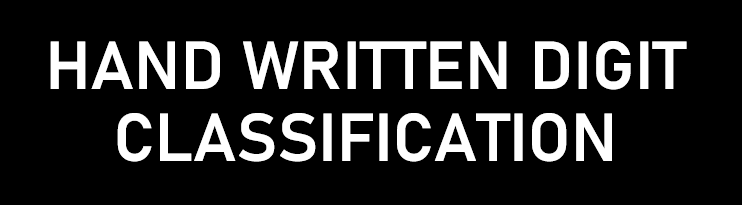

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

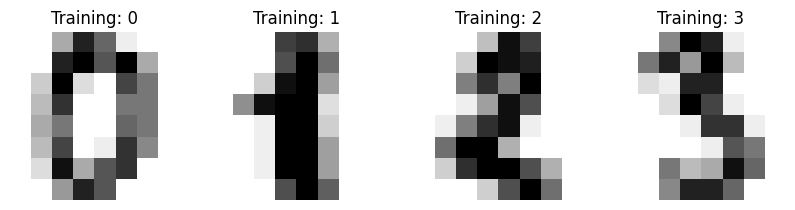

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap = plt.cm.gray_r, interpolation = 'nearest')
  ax.set_title("Training: %i" % label)

In [3]:
digits.images.shape

(1797, 8, 8)

In [4]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
digits.images[0].shape

(8, 8)

In [6]:
len(digits.images)

1797

In [7]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [8]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
data[0].shape

(64,)

In [10]:
data.shape

(1797, 64)

In [11]:
data.min()

0.0

In [12]:
data.max()

16.0

In [13]:
data = data/16

In [14]:
data.min()

0.0

In [15]:
data.max()

1.0

In [16]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size = 0.3)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier()

In [22]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(x_test)

In [24]:
y_pred

array([5, 7, 5, 4, 3, 4, 0, 2, 6, 1, 5, 8, 2, 8, 1, 1, 4, 9, 2, 0, 0, 4,
       3, 8, 6, 3, 3, 6, 6, 1, 1, 4, 4, 8, 3, 4, 6, 5, 7, 5, 9, 7, 6, 9,
       0, 1, 5, 1, 6, 9, 3, 4, 1, 6, 4, 1, 5, 4, 0, 1, 5, 3, 1, 9, 2, 8,
       7, 1, 7, 1, 2, 3, 5, 7, 5, 4, 9, 2, 5, 2, 9, 2, 0, 1, 2, 7, 6, 2,
       4, 8, 4, 4, 5, 7, 1, 0, 9, 0, 6, 6, 9, 8, 6, 4, 6, 1, 1, 5, 1, 0,
       4, 5, 5, 9, 8, 9, 7, 0, 4, 8, 3, 1, 4, 4, 8, 3, 8, 5, 8, 3, 8, 3,
       6, 9, 9, 4, 6, 5, 4, 9, 9, 3, 3, 0, 8, 5, 6, 7, 7, 8, 6, 3, 4, 2,
       9, 9, 5, 4, 6, 1, 9, 8, 1, 8, 1, 7, 3, 5, 6, 8, 1, 0, 7, 2, 4, 3,
       3, 9, 0, 0, 9, 6, 8, 6, 4, 7, 7, 8, 6, 2, 9, 0, 4, 7, 8, 8, 0, 5,
       6, 1, 9, 9, 5, 2, 3, 9, 2, 0, 7, 2, 6, 2, 0, 1, 1, 2, 9, 2, 3, 8,
       3, 0, 5, 3, 9, 8, 2, 1, 1, 0, 9, 2, 5, 1, 6, 8, 9, 6, 6, 0, 6, 8,
       6, 7, 2, 6, 3, 5, 3, 3, 2, 5, 3, 1, 4, 1, 7, 0, 1, 2, 0, 9, 8, 7,
       9, 1, 8, 5, 1, 4, 3, 9, 1, 2, 8, 1, 3, 9, 8, 9, 8, 4, 6, 0, 0, 1,
       3, 2, 7, 7, 8, 7, 6, 6, 8, 9, 2, 1, 0, 0, 2,

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
confusion_matrix(y_test, y_pred)

array([[64,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  2,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 61,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  0],
       [ 0,  4,  0,  0,  0,  1,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 53]])

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       0.93      1.00      0.96        54
           2       1.00      0.98      0.99        47
           3       1.00      0.93      0.96        55
           4       1.00      1.00      1.00        61
           5       0.93      0.98      0.95        42
           6       0.98      1.00      0.99        56
           7       1.00      1.00      1.00        51
           8       0.94      0.91      0.93        56
           9       1.00      0.98      0.99        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540





---



# **ENHANCEMENT SUGGESTED BY CHATGPT**

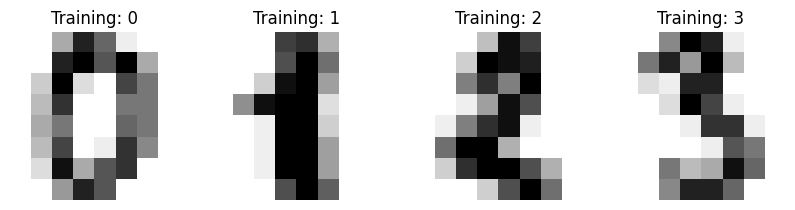

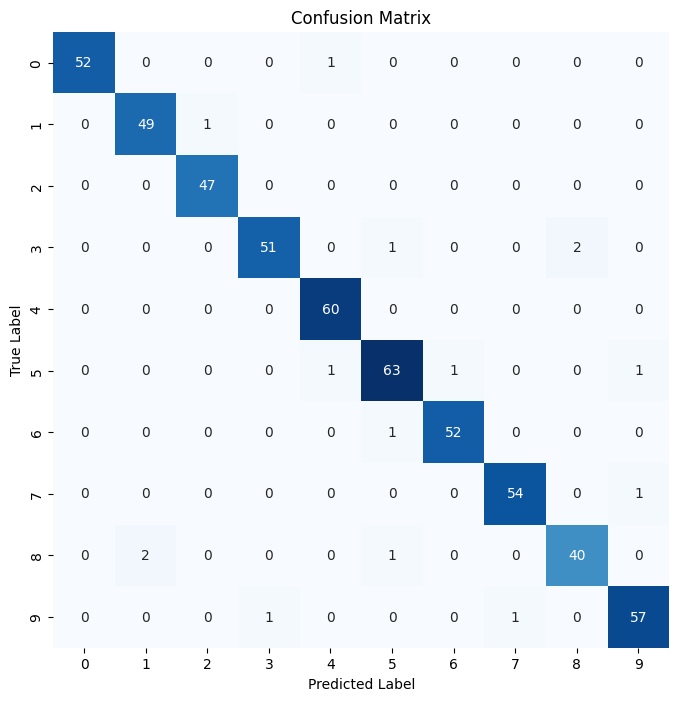

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.93      0.94        43
           9       0.97      0.97      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load digits dataset
digits = load_digits()

# Visualize the first four digits
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training: %i" % label)

# Reshape the data and normalize
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data = data / 16

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)

# Build and train the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions
y_pred = rf.predict(x_test)

# Model evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Display classification report
print(classification_rep)